# TP2 Traitement Autonmatique de la Parole

**NOM** : El harty

**Prénom** : Moadh

**Email** : moadh_el.harty_@hotmail.com



Initialisation de l'environnement de TP

In [1]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import scipy.signal
import numpy as np
from IPython.display import Audio

In [2]:
!tree tp-3en-n7/signaux/alpha/

Structure du dossier
Le numéro de série du volume est 7638-126C
C:\USERS\MOADH\DOCUMENTS\M2_IATI\TRAITEMENT DE LA PAROLE\TP-3EN-N7\TP-3EN-N7\SIGNAUX\ALPHA\
Chemin d’accès non valide - \USERS\MOADH\DOCUMENTS\M2_IATI\TRAITEMENT DE LA PAROLE\TP-3EN-N7\TP-3EN-N7\SIGNAUX\ALPHA\
Aucun sous-dossier existant 



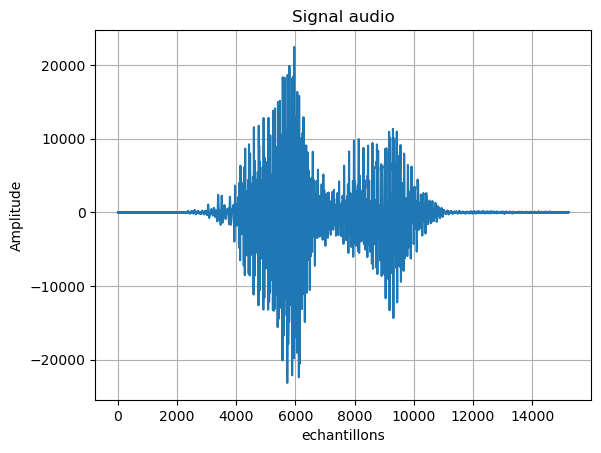

In [2]:
(fe,signal) =  scipy.io.wavfile.read("signaux/alpha/references/bravo.wav")
# Affichage du signal
plt.figure(1)
plt.plot(np.arange(len(signal)),signal)
plt.xlabel('echantillons')
plt.ylabel('Amplitude')
plt.title('Signal audio')
plt.grid(True)
plt.show()
# lecture du fichier
Audio(data=signal, rate=fe)

Nous allons commencer par travailler sur un extrait voisé du signal :

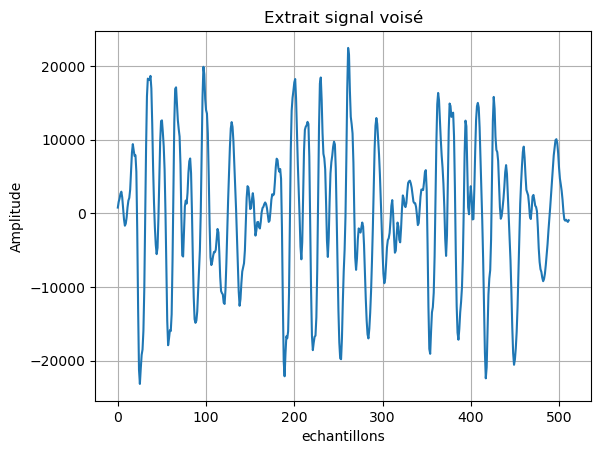

In [3]:
extrait = signal[5700:6212]
# Affichage du signal
plt.figure(1)
plt.plot(np.arange(len(extrait)),extrait)
plt.xlabel('echantillons')
plt.ylabel('Amplitude')
plt.title('Extrait signal voisé')
plt.grid(True)
plt.show()

***Affichez une fenetre hamming de 512 points. Puis créez la variable extrait_fenetre qui resulte de la multiplication point par point de la fenetre de hamming et de l'extrait de signal. Affichez le signal résultant.***

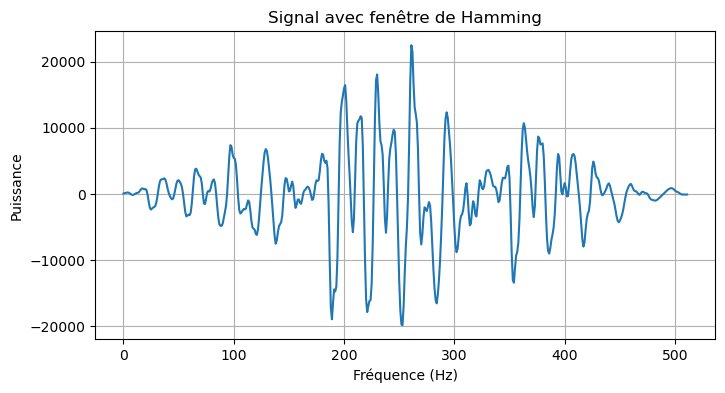

In [16]:
fenetre_hamming = np.hamming(512)
extrait_fenetre = fenetre_hamming * extrait
plt.figure(figsize=(8, 4))
plt.plot( extrait_fenetre)
plt.title('Signal avec fenêtre de Hamming')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Puissance')
plt.grid(True)
plt.show()

***Affichez le spectre de puissance de la transformée de Fourier de l'extrait fenetré. Représentez les fréquences en abscisse. Vous pouvez utiliser la fonction np.fft.fft pour calculer la transformée de Fourier ou bien utiliser son équivalent sur librosa.***

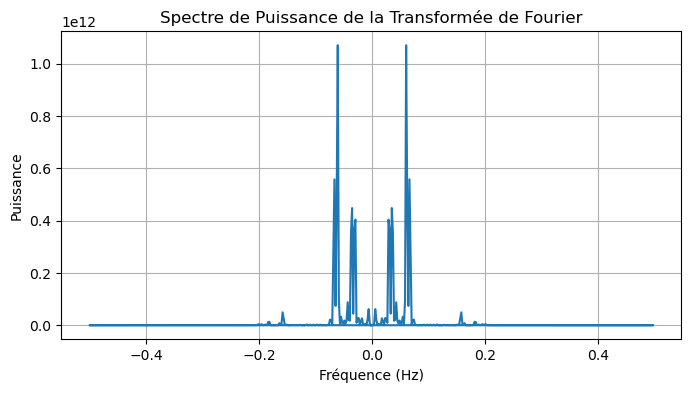

In [5]:
spectre = np.fft.fft(extrait_fenetre)
puissance_spectre = np.abs(spectre) ** 2

freq = np.fft.fftfreq(len(spectre))
plt.figure(figsize=(8, 4))
plt.plot(freq, puissance_spectre)
plt.title('Spectre de Puissance de la Transformée de Fourier')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Puissance')
plt.grid(True)
plt.show()

***Affichez un spectrogramme du signal de départ.***

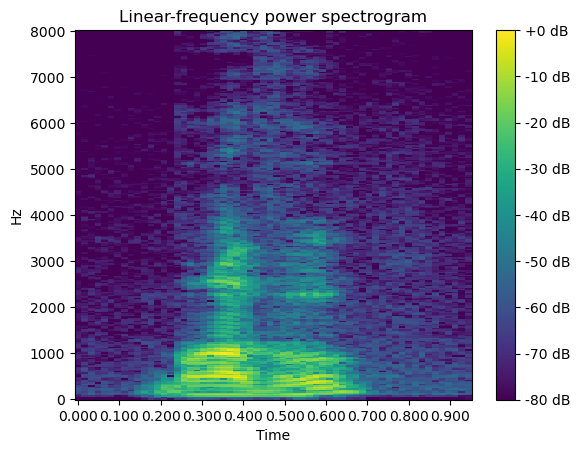

In [6]:
import librosa
import librosa.display
d, sr = librosa.load('signaux/alpha/references/bravo.wav', sr=16000, mono=True)
sp = np.abs(librosa.stft(d, n_fft=512, hop_length=256, window=np.hanning(512 + 2)[1:-1]))
sp = 20.0 * np.log10(np.maximum(sp, np.max(sp) / 1e6))
sp = sp - np.mean(sp)
sp = sp - np.max(sp)
librosa.display.specshow(sp, sr=16000, hop_length=256, y_axis='linear', x_axis='time', cmap='viridis', vmin=-80.0, vmax=0)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

***Calculez le log énergie du signal sur des fenêtres de 512 points avec recouvrement sur la moitié. Affichez les valeurs ainsi calculées aligné avec le signal.***

$E=\log\left(\sum_{i=1}^{n}x_{i}^{2}\right)$

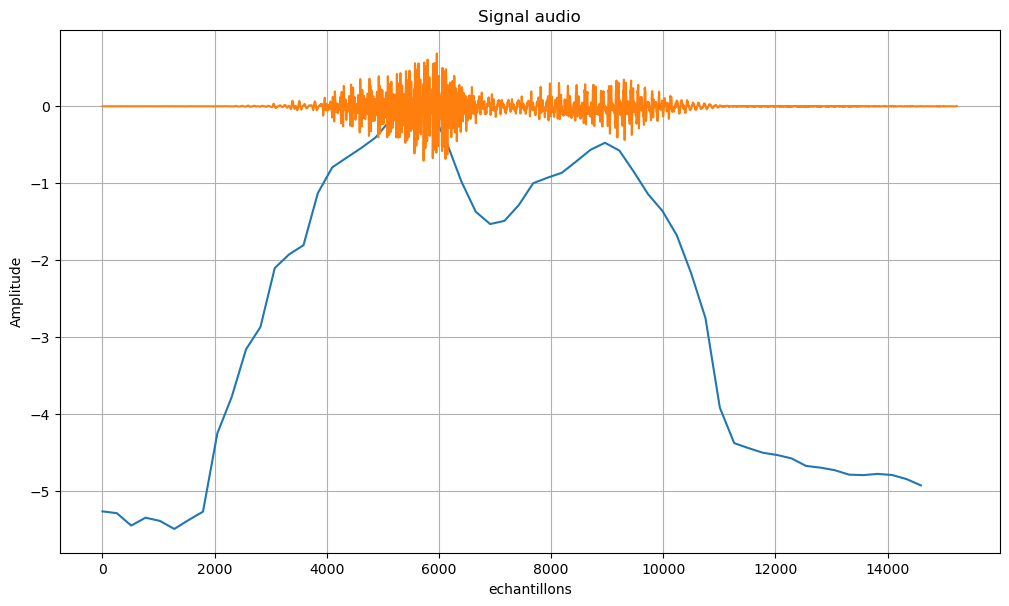

In [39]:
# Génération du signal (remplacez ceci par votre propre signal)
signal, sr = librosa.load('signaux/alpha/references/bravo.wav', sr=None)

# Paramètres de la fenêtre et du recouvrement
taille_fenetre = 512
recouvrement = taille_fenetre // 2
extraits=[signal[i:i+taille_fenetre] for i in range(0,len(signal)-taille_fenetre,recouvrement)]
energie=np.array([np.sum(frame**2) for frame in extraits])
energie=(energie)/np.max(energie)
log_energie=np.log10(energie)
plt.figure(figsize=(10, 6))


# Affichage du log énergie
plt.plot([i for i in range(0,len(signal)-512,256)],log_energie)
plt.title('Log Énergie du Signal')

plt.tight_layout()
plt.plot(np.arange(len(signal)),signal)
plt.xlabel('echantillons')
plt.ylabel('Amplitude')
plt.title('Signal audio')
plt.grid(True)
plt.show()

***Peut-on repérer les voyelles facilement avec cette représentation ?***

Réponse...

***Calculez le cepstre de l'extrait de signal. Affichez le. Où se trouve l'excitation liée à la vibration des cordes vocales ?***

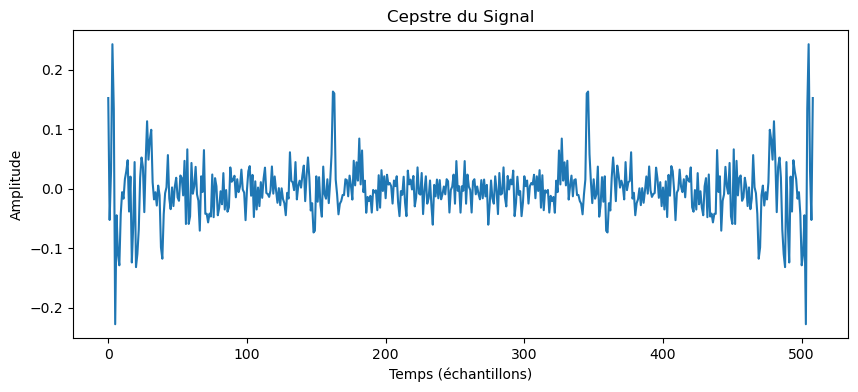

In [13]:



# Calcul du spectre du signal
spectre = np.fft.fft(extrait)

# Calcul du log-spectre
log_spectre = np.log(np.abs(spectre) + 1e-10)  # Ajout d'une petite constante pour éviter le logarithme de zéro

# Calcul du cepstre en prenant la transformée de Fourier inverse du log-spectre
cepstre = (np.fft.ifft(log_spectre))

# Affichage du cepstre
plt.figure(figsize=(10, 4))
plt.plot(cepstre[2:-1])
plt.title('Cepstre du Signal')
plt.xlabel('Temps (échantillons)')
plt.ylabel('Amplitude')
plt.show()

***Calculez et affichez le spectre lissé de cet extrait.***

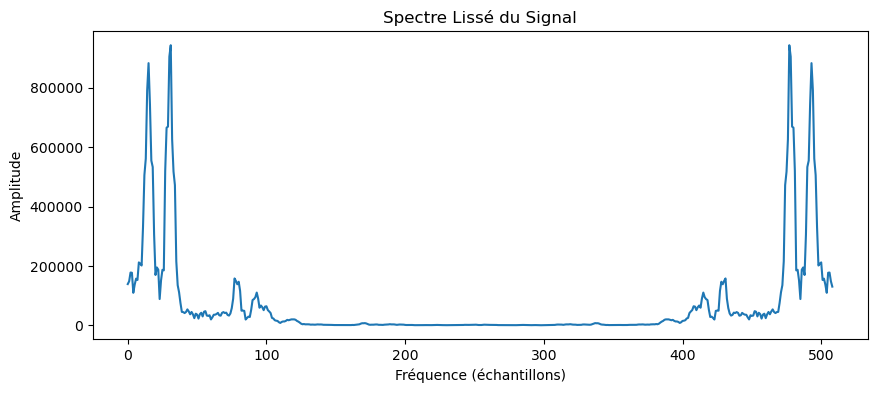

In [14]:
# Calcul du spectre du signal
spectre = fft(extrait)

# Lissage du spectre (par exemple, en utilisant une moyenne mobile sur 5 points)
fenetre_lissage = np.ones(5) / 5
spectre_lisse = np.convolve(np.abs(spectre), fenetre_lissage, mode='same')

# Affichage du spectre lissé
plt.figure(figsize=(10, 4))
plt.plot(spectre_lisse[2:-1])
plt.title('Spectre Lissé du Signal')
plt.xlabel('Fréquence (échantillons)')
plt.ylabel('Amplitude')
plt.show()


***En utilisant librosa, affichez une matrice des 12 premiers coefficients MFCC
du signal de départ.***

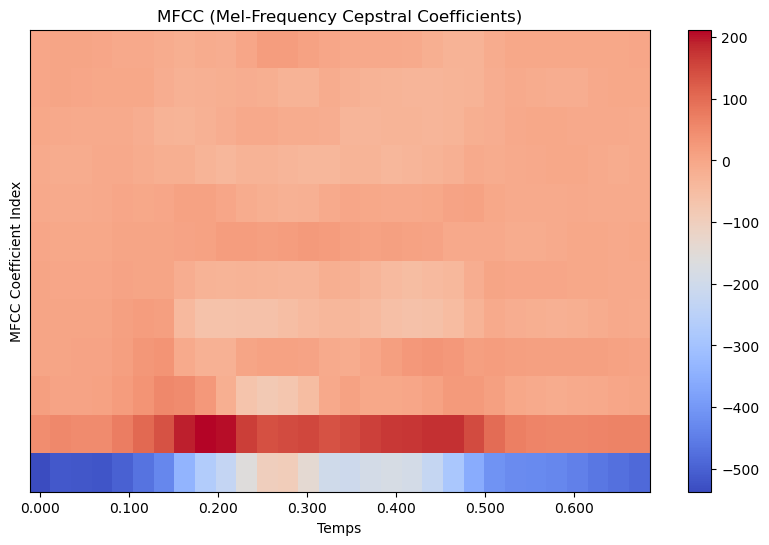

In [42]:
signal, sr = librosa.load('signaux/alpha/references/bravo.wav', sr=None)
mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=12)

# Afficher la matrice des 12 premiers coefficients MFCC
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC (Mel-Frequency Cepstral Coefficients)')
plt.xlabel('Temps')
plt.ylabel('MFCC Coefficient Index')
plt.show()

***Ajoutez a cette matrice votre propre calcul de l'énergie normalisé. Y a-t-il une corrélation avec un des coefficients MFCC ?***

(12, 30)


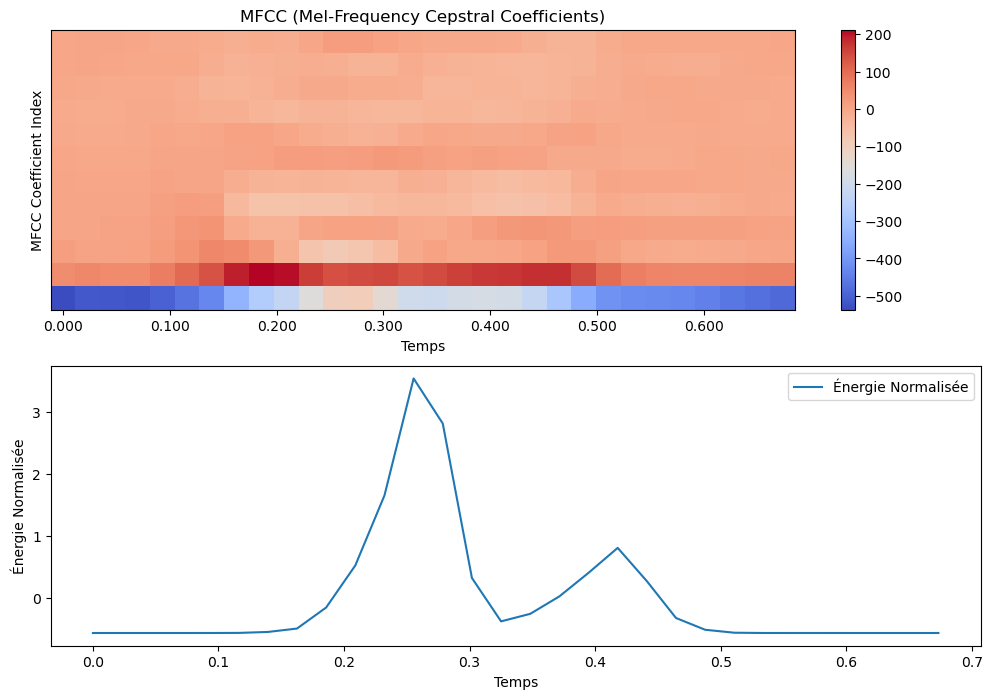

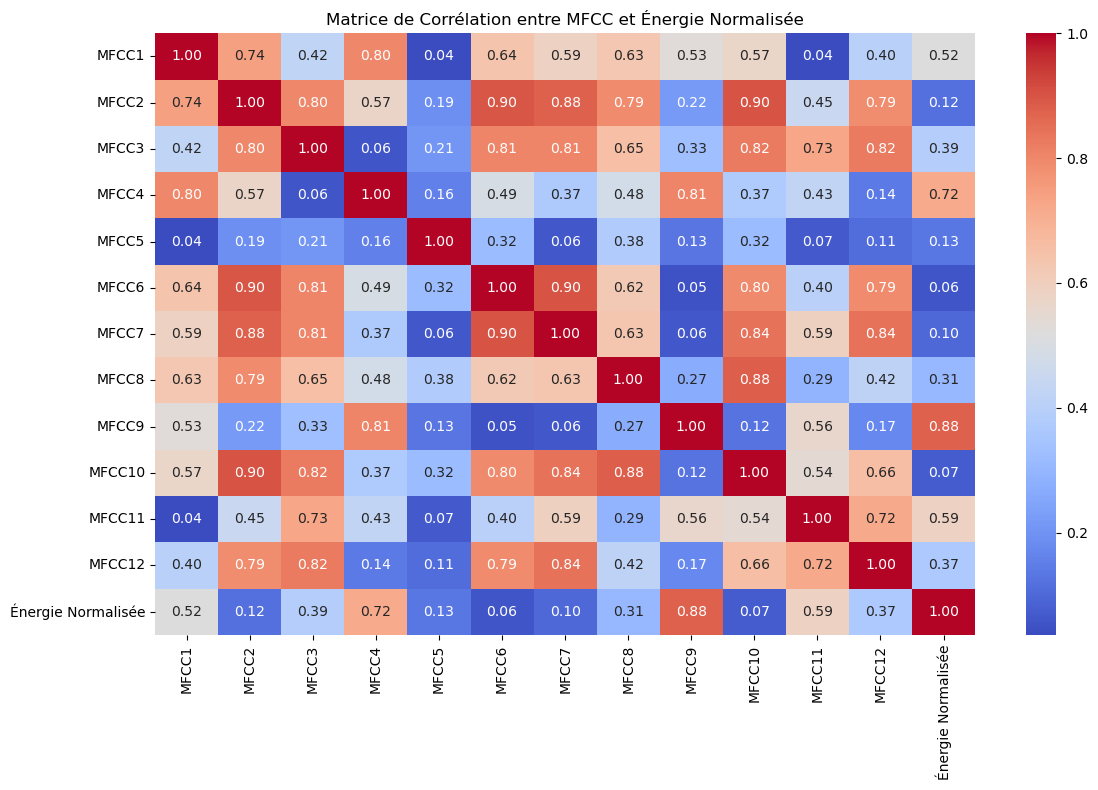

In [15]:
import seaborn as sns


# Calculer les coefficients MFCC
mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=12)
print(mfccs.shape)
# Calculer l'énergie normalisée
energie = np.sum(np.abs(librosa.stft(signal))**2, axis=0)
freq = np.fft.fftfreq(len(energie))

energie_normalisee = (energie - np.mean(energie)) / np.std(energie)
matrice_corr=np.corrcoef(energie_normalisee,mfccs)
# Afficher la matrice des 12 premiers coefficients MFCC
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC (Mel-Frequency Cepstral Coefficients)')
plt.xlabel('Temps')
plt.ylabel('MFCC Coefficient Index')

# Afficher l'énergie normalisée
plt.subplot(2, 1, 2)
plt.plot(librosa.times_like(energie_normalisee), energie_normalisee, label='Énergie Normalisée')
plt.xlabel('Temps')
plt.ylabel('Énergie Normalisée')
plt.legend()

plt.figure(figsize=(12, 8))
sns.heatmap(np.abs(matrice_corr), annot=True, fmt=".2f", cmap="coolwarm", xticklabels=[f'MFCC{i}' for i in range(1,13)] +['Énergie Normalisée'], yticklabels=[f'MFCC{i}' for i in range(1,13)] +['Énergie Normalisée'])
plt.title('Matrice de Corrélation entre MFCC et Énergie Normalisée')

plt.tight_layout()
plt.show()

On constate que l'énergie normalisée est fortement corrélée à la composante 9 et 4 de la MFCC.

Calculez et affichez la matrice des PLP avec [rasta_py](https://github.com/mystlee/rasta_py). Des exemples d'utilisation pour Matlab se trouvent ici : [RastaMat](https://labrosa.ee.columbia.edu/matlab/rastamat/)

In [18]:
import librosa
import librosa.filters
import scipy
import scipy.fftpack as fft
from scipy import signal
import spectrum

def rastaplp(x, fs = 16000, win_time = 0.040, hop_time = 0.020, dorasta = True, modelorder = 8):
    # first compute power spectrum
    p_spectrum, _ = powspec(x, fs, win_time, hop_time)
    # next group to critical bands
    aspectrum = audspec(p_spectrum, fs)
    nbands = aspectrum.shape[0]

    if dorasta:
        # put in log domain
        nl_aspectrum = np.log(aspectrum)
        # next do rasta filtering
        ras_nl_aspectrum = rastafilt(nl_aspectrum)
        # do inverse log
        aspectrum = np.exp(ras_nl_aspectrum)

    postspectrum, _ = postaud(aspectrum, fs / 2)

    lpcas = dolpc(postspectrum, modelorder);
    cepstra = lpc2cep(lpcas, modelorder + 1);

    if modelorder > 0:
        lpcas = dolpc(postspectrum, modelorder);
        cepstra = lpc2cep(lpcas, modelorder + 1);
        spectra,F,M = lpc2spec(lpcas, nbands);
    else:
        spectra = postspectrum
        cepstra = spec2cep(spectra)

    cepstra = lifter(cepstra, 0.6)

    return cepstra

def powspec(x, fs = 16000, window_time = 0.040, hop_time = 0.020, dither = 1):
    win_length = int(np.round(window_time * fs))
    hop_length = int(np.round(hop_time * fs))
    fft_length = int(np.power(2, np.ceil(np.log2(window_time * fs))))

    X = librosa.stft(np.multiply(32768, x), n_fft = fft_length, hop_length = hop_length,
                     win_length = win_length, window='hann', center = False)
    pow_X = np.power(np.abs(X), 2)
    if dither:
        pow_X = np.add(pow_X, win_length)
    e = np.log(np.sum(pow_X, axis = 0))
    return pow_X, e

def hz2bark(f):
    z = np.multiply(6, np.arcsinh(np.divide(f, 600)))
    return z

def bark2hz(z):
    hz = np.multiply(600, np.sinh(np.divide(z, 6)))
    return hz

def fft2barkmx(fft_length, fs, nfilts = 0, band_width = 1, min_freq = 0, max_freq = 0):
    if max_freq == 0:
        max_freq = fs / 2

    min_bark = hz2bark(min_freq)
    nyqbark = hz2bark(max_freq) - min_bark

    if nfilts == 0 :
        nfilts = np.add(np.ceil(nyqbark), 1)

    wts = np.zeros((int(nfilts), int(fft_length)))
    step_barks = np.divide(nyqbark, np.subtract(nfilts, 1))
    binbarks = hz2bark(np.multiply(np.arange(0, np.add(np.divide(fft_length, 2),1)), np.divide(fs, fft_length)))

    for i in range (int(nfilts)):
        f_bark_mid = min_bark + np.multiply(i, step_barks)
        lof = np.subtract(np.subtract(binbarks, f_bark_mid), 0.5)
        hif = np.add(np.subtract(binbarks, f_bark_mid), 0.5)
        wts[i, 0 : int(fft_length / 2) + 1] = np.power(10, np.minimum(0, np.divide(np.minimum(hif, np.multiply(-2.5, lof)), band_width)))
    return wts

def rastafilt(x):
    numer = np.arange(-2, 3)
    numer = np.divide(-numer, np.sum(np.multiply(numer, numer)))
    denom = np.array([1, -0.94])

    zi = signal.lfilter_zi(numer,1)
    y = np.zeros((x.shape))
    for i in range(x.shape[0]):
        y1, zi = signal.lfilter(numer, 1, x[i, 0:4], axis = 0, zi = zi * x[i, 0])
        y1 = y1*0
        y2, _ = signal.lfilter(numer, denom, x[i, 4:x.shape[1]], axis = 0, zi = zi)
        y[i, :] = np.append(y1, y2)
    return y


def dolpc(x, modelorder = 8):
    nbands, nframes = x.shape
    ncorr = 2 * (nbands - 1)
    R = np.zeros((ncorr, nframes))

    R[0:nbands, :] = x
    for i in range(nbands - 1):
        R[i + nbands - 1, :] = x[nbands - (i + 1), :]

    r = fft.ifft(R.T).real.T
    r = r[0:nbands, :]

    y = np.ones((nframes, modelorder + 1))
    e = np.zeros((nframes, 1))

    if modelorder == 0:
        for i in range(nframes):
            _ , e_tmp, _ = spectrum.LEVINSON(r[:, i], modelorder, allow_singularity = True)
            e[i, 0] = e_tmp
    else:
        for i in range(nframes):
            y_tmp, e_tmp, _ = spectrum.LEVINSON(r[:, i], modelorder, allow_singularity = True)
            y[i, 1:modelorder + 1] = y_tmp
            e[i, 0] = e_tmp

    y = np.divide(y.T, np.add(np.tile(e.T, (modelorder + 1, 1)), 1e-8))

    return y

def lpc2cep(a, nout = 0):
    nin, ncol = a.shape

    order = nin - 1

    if nout == 0:
        nout = order + 1

    cep = np.zeros((nout, ncol))
    cep[0, :] = -np.log(a[0, :])

    norm_a = np.divide(a, np.add(np.tile(a[0, :], (nin, 1)), 1e-8))

    for n in range(1, nout):
        sum = 0
        for m in range(1, n):
            sum = np.add(sum, np.multiply(np.multiply((n - m), norm_a[m, :]), cep[(n - m), :]))

        cep[n, :] = -np.add(norm_a[n, :], np.divide(sum, n))

    return cep

def lifter(x, lift = 0.6, invs = False):
    ncep = x.shape[0]

    if lift == 0:
        y = x
    else:
        if lift < 0:
            warnings.warn('HTK liftering does not support yet; default liftering')
            lift = 0.6
        liftwts = np.power(np.arange(1, ncep), lift)
        liftwts = np.append(1, liftwts)

        if (invs):
            liftwts = np.divide(1, liftwts)

        y = np.matmul(np.diag(liftwts), x)

    return y

def melfcc(x, fs = 16000, min_freq = 50, max_freq = 6500, n_mfcc = 13, n_bands = 40, lifterexp = 0.6,
          fbtype = 'fcmel', dcttype = 1, usecmp = True, window_time = 0.040, hop_time = 0.020,
          preemph = 0.97, dither = 1, sumpower = 1, band_width = 1, modelorder = 0,
           broaden = 0, useenergy = False):

    if preemph != 0:
        b = [1, -preemph]
        a = 1
        x = signal.lfilter(b, a, x)

    pspectrum, logE = powspec(x, fs = fs, window_time = window_time, hop_time = hop_time, dither = dither)
    aspectrum = audspec(pspectrum, fs = fs, nfilts = n_bands, fbtype = fbtype,
                        min_freq = min_freq, max_freq = max_freq)

    if usecmp:
        aspectrum, _ = postaud(aspectrum, fmax = max_freq, fbtype = fbtype)

    if modelorder > 0:
        lpcas = dolpc(aspectrum, modelorder)
        cepstra = lpc2cep(lpcas, nout = n_mfcc)

    else:
        cepstra, _ = spec2cep(aspectrum, ncep = n_mfcc, dcttype = dcttype)

    cepstra = lifter(cepstra, lift = lifterexp);

    if useenergy == True:
        cepstra[0, :] = logE

    return cepstra


def hz2mel(f, htk = False):
    if htk:
        z = np.multiply(2595, np.log10(np.add(1, np.divide(f, 700))))
    else:
        f_0 = 0.0
        f_sp = 200 / 3
        brkfrq = 1000
        brkpt = (brkfrq - f_0) / f_sp
        logstep = np.exp(np.log(6.4) / 27.0)

        f = np.array(f, ndmin = 1)
        z = np.zeros((f.shape[0], ))

        for i in range(f.shape[0]):
            if f[i] < brkpt:
                z[i] = (f[i] - f_0) / f_sp
            else:
                z[i] = brkpt + (np.log(f[i] / brkfrq) / np.log(logstep))
    return z

def mel2hz(z, htk = False):
    if htk:
        f = np.multiply(700, np.subtract(np.power(10, np.divide(z, 2595)), 1))
    else:
        f_0 = 0
        f_sp = 200/3
        brkfrq = 1000
        brkpt = (brkfrq - f_0) / f_sp
        logstep = np.exp(np.log(6.4) / 27.0)

        z = np.array(z, ndmin = 1)
        f = np.zeros((z.shape[0], ))

        for i in range(z.shape[0]):
            if z[i] < brkpt:
                f[i] = f_0 + f_sp * z[i]
            else:
                f[i] = brkfrq * np.exp(np.log(logstep) * (z[i] - brkpt))
    return f

def fft2melmx(fft_length, fs, nfilts = 0, band_width = 1, min_freq = 0, max_freq = 0,
              htk = False, constamp = False):
    if nfilts == 0 :
        nfilts = np.ceil(hz2mel(max_freq, htk) / 2)
    if max_freq == 0:
        max_freq = fs / 2

    wts = np.zeros((int(nfilts), int(fft_length)))
    fftfrqs = np.multiply(np.divide(np.arange(0,fft_length / 2 + 1), fft_length), fs)

    min_mel = hz2mel(min_freq, htk)
    max_mel = hz2mel(max_freq, htk)
    binfrqs = mel2hz(np.add(min_mel, np.multiply(np.arange(0, nfilts + 2),
                                                 (max_mel - min_mel) / (nfilts + 1))), htk)

    for i in range (int(nfilts)):
        fs_tmp = binfrqs[np.add(np.arange(0,3), i)]
        fs_tmp = np.add(fs_tmp[1], np.multiply(band_width, np.subtract(fs_tmp, fs_tmp[1])))
        loslope = np.divide(np.subtract(fftfrqs, fs_tmp[0]), np.subtract(fs_tmp[1], fs_tmp[0]))
        hislope = np.divide(np.subtract(fs_tmp[2], fftfrqs), np.subtract(fs_tmp[2], fs_tmp[1]))
        wts[i, 0 : int(fft_length / 2) + 1] = np.maximum(0, np.minimum(loslope, hislope))

    if constamp == False:
        wts = np.matmul(np.diag(np.divide(2, np.subtract(binfrqs[2 : int(nfilts) + 2],
                                                         binfrqs[0 : int(nfilts)]))), wts)

    return wts

def audspec(p_spectrum, fs = 16000, nfilts = 0, fbtype = 'bark',
            min_freq = 0, max_freq = 0, sumpower = 1, band_width = 1):
    if nfilts == 0:
        np.add(np.ceil(hz2bark(fs / 2)), 1)
    if max_freq == 0:
        max_freq = fs / 2
    nfreqs = p_spectrum.shape[0]
    nfft = (int(nfreqs) - 1) * 2

    if fbtype == 'bark':
        wts = fft2barkmx(nfft, fs, nfilts, band_width, min_freq, max_freq)
    elif fbtype == 'mel':
        wts = fft2melmx(nfft, fs, nfilts, band_width, min_freq, max_freq)
    elif fbtype == 'htkmel':
        wts = fft2melmx(nfft, fs, nfilts, band_width, min_freq, max_freq, htk = True, constamp = True)
    elif fbtype == 'fcmel':
        wts = fft2melmx(nfft, fs, nfilts, band_width, min_freq, max_freq, htk = True, constamp = False)

    wts = wts[:, 0 : nfreqs]

    if sumpower:
        aspectrum = np.matmul(wts, p_spectrum)
    else:
        aspectrum = np.power(np.matmul(wts, np.sqrt(p_spectrum)), 2)
    return aspectrum

def postaud(x, fmax, fbtype = 'bark', broaden = 0):
    nbands, nframes = x.shape
    nfpts = int(nbands + 2 * broaden)

    if fbtype == 'bark':
        bandcfhz = bark2hz(np.linspace(0, hz2bark(fmax), nfpts))
    elif fbtype == 'mel':
        bandcfhz = mel2hz(np.linspace(0, hz2mel(fmax), nfpts))
    elif fbtype == 'htkmel' or fbtype == 'fcmel':
        bandcfhz = mel2hz(np.linspace(0, hz2mel(fmax, htk = True), nfpts), htk = True)

    bandcfhz = bandcfhz[broaden : (nfpts - broaden)];

    fsq = np.power(bandcfhz, 2)
    ftmp = np.add(fsq, 1.6e5)
    eql = np.multiply(np.power(np.divide(fsq, ftmp), 2), np.divide(np.add(fsq, 1.44e6), np.add(fsq, 9.61e6)))

    z = np.multiply(np.tile(eql, (nframes, 1)).T, x)
    z = np.power(z, 0.33)

    if broaden:
        y = np.zeros((z.shape[0] + 2, z.shape[1]))
        y[0, :] = z[0, :]
        y[1:nbands + 1, :] = z
        y[nbands + 1, :] = z[z.shape[0] - 1, :]
    else:
        y = np.zeros((z.shape[0], z.shape[1]))
        y[0, :] = z[1, :]
        y[1:nbands - 1, :] = z[1:z.shape[0] - 1, :]
        y[nbands - 1, :] = z[z.shape[0] - 2, :]

    return y, eql

def spec2cep(spec, ncep, dcttype):
    nrow, ncol = spec.shape[0], spec.shape[1]
    dctm = np.zeros((ncep, nrow))

    if dcttype == 2 or dcttype == 3:
        for i in range(ncep):
            dctm[i, :] = np.multiply(np.cos(np.multiply(np.divide(np.multiply(i, np.arange(1, 2 * nrow, 2)), (2 * nrow)), np.pi)), np.sqrt(2 / nrow))

        if dcttype == 2:
            dctm[0, :] = np.divide(dctm[0, :], np.sqrt(2))

    elif dcttype == 4:
        for i in range(ncep):
            dctm[i, :] = np.multiply(np.cos(np.multiply(np.divide(np.multiply(i, np.arange(1, nrow + 1)), (nrow + 1)), np.pi)), 2)
            dctm[i, 0] = np.add(dctm[i, 0], 1)
            dctm[i, int(nrow - 1)] = np.multiply(dctm[i, int(nrow - 1)], np.power(-1, i))
        dctm = np.divide(dctm, 2 * (nrow + 1))

    else:
        for i in range(ncep):
            dctm[i, :] = np.divide(np.multiply(np.cos(np.multiply(np.divide(np.multiply(i, np.arange(0, nrow)), (nrow - 1)), np.pi)), 2), 2 * (nrow - 1))
        dctm[:, 0] = np.divide(dctm[:, 0], 2)
        dctm[:, int(nrow - 1)] = np.divide(dctm[:, int(nrow - 1)], 2)

    cep = np.matmul(dctm, np.log(np.add(spec, 1e-8)))

    return cep, dctm

def lpc2spec(lpcas, nout = 17, FMout = False):

    rows, cols = lpcas.shape
    order = rows - 1

    gg = lpcas[0, :]
    aa = np.divide(lpcas, np.tile(gg, (rows, 1)))

#    Calculate the actual z-plane polyvals: nout points around unit circle
    tmp_1 = np.array(np.arange(0, nout), ndmin = 2).T
    tmp_1 = np.divide(np.multiply(-1j, np.multiply(tmp_1, np.pi)), (nout - 1))
    tmp_2 = np.array(np.arange(0, order + 1), ndmin = 2)
    zz = np.exp(np.matmul(tmp_1, tmp_2))
#    Actual polyvals, in power (mag^2)
    features = np.divide(np.power(np.divide(1, np.abs(np.matmul(zz, aa))), 2), np.tile(gg, (nout, 1)))
    F = np.zeros((cols, int(np.ceil(rows / 2))))
    M = F

    if FMout == True:
        for c in range(cols):
            aaa = aa[:, c]
            rr = np.roots(aaa)
            ff_tmp = np.angle(rr)
            ff = np.array(ff_tmp, ndmin = 2).T
            zz = np.exp(np.multiply(1j, np.matmul(ff, np.array(np.arange(0, aaa.shape[0]), ndmin = 2))))
            mags = np.sqrt(np.divide(np.power(np.divide(1, np.abs(np.matmul(zz, np.array(aaa, ndmin = 2).T))), 2), gg[c]))

            ix = np.argsort(ff_tmp)
            dummy = np.sort(ff_tmp)
            mp_F_list = []
            tmp_M_list = []

            for i in range(ff.shape[0]):
                if dummy[i] > 0:
                    tmp_F_list = np.append(tmp_F_list, dummy[i])
                    tmp_M_list = np.append(tmp_M_list, mags[ix[i]])

            M[c, 0 : tmp_M_list.shape[0]] = tmp_M_list
            F[c, 0 : tmp_F_list.shape[0]] = tmp_F_list

    return features, F, M

def deltas(x, w = 9):
    rows, cols = x.shape
    hlen = np.floor(w / 2)
    win = np.arange(hlen,-(hlen + 1),-1, dtype = 'float32')

    xx = np.append(np.append(np.tile(x[:, 0], (int(hlen), 1)).T, x, axis = 1),
               np.tile(x[:, cols - 1], (int(hlen), 1)).T, axis = 1)

    d = signal.lfilter(win, 1, xx, axis = 1)
    d = d[:, int(2 * hlen) : int(2 * hlen + cols)]
    return d

def cep2spec(cep, nfreq, dcttype = 2):
    ncep, ncol = cep.shape

    dctm  = np.zeros((ncep, nfreq))
    idctm = np.zeros((nfreq, ncep))

    if dcttype == 2 or dcttype == 3:
        for i in range(ncep):
            dctm[i, :] = np.multiply(np.cos(np.multiply(np.divide(np.multiply(i, np.arange(1, 2 * nfreq, 2)),
                                                                  (2 * nfreq)), np.pi)), np.sqrt(2 / nfreq))

        if dcttype == 2:
            dctm[0, :] = np.divide(dctm[0, :], np.sqrt(2))
        else:
            dctm[0, :] = np.divide(dctm[0, :], 2)

        idctm = dctm.T

    elif dcttype == 4:
        for i in range(ncep):
            idctm[:, i] = np.multiply(np.cos(np.multiply(np.divide(np.multiply(i, np.arange(1, nfreq + 1).T), (nfreq + 1)), np.pi)), 2)

        idctm[:, 0:ncep] = np.divide(idctm[:, 0:ncep], 2)

    else:
        for i in range(ncep):
            idctm[:, i] = np.multiply(np.cos(np.multiply(np.divide(np.multiply(i, np.arange(0, nfreq).T), (nfreq - 1)), np.pi)), 2)

        idctm[:, [0, -1]] = np.divide(idctm[:, [0, -1]], 2)

    spec = np.exp(np.matmul(idctm, cep))

    return spec, idctm

def invpostaud(y, fmax, fbtype = 'bark', broaden = 0):

    nbands, nframes = y.shape

    if fbtype == 'bark':
        bandcfhz = bark2hz(np.linspace(0, hz2bark(fmax), nbands))
    elif fbtype == 'mel':
        bandcfhz = mel2hz(np.linspace(0, hz2mel(fmax), nbands))
    elif fbtype == 'htkmel' or fbtype == 'fcmel':
        bandcfhz = mel2hz(np.linspace(0, hz2mel(fmax, htk = True), nbands), htk = True)

    bandcfhz = bandcfhz[broaden : (nbands - broaden)]

    fsq = np.power(bandcfhz, 2)
    ftmp = np.add(fsq, 1.6e5)
    eql = np.multiply(np.power(np.divide(fsq, ftmp), 2),
                      np.divide(np.add(fsq, 1.44e6), np.add(fsq, 9.61e6)))

    x = np.power(y, np.divide(1, 0.33))

    if eql[0] == 0:
        eql[0] = eql[1]
        eql[-1] = eql[-2]

    x = np.divide(x[broaden : (nbands - broaden + 1), :], np.add(np.tile(eql.T, (nframes, 1)).T, 1e-8))

    return x, eql

def invpowspec(y, fs, win_time, hop_time, excit = []):
    nrow, ncol = y.shape
    r = excit

    winpts = int(np.round(np.multiply(win_time, fs)))
    steppts = int(np.round(np.multiply(hop_time, fs)))
    nfft = int(np.power(2, np.ceil(np.divide(np.log(winpts), np.log(2)))))

    # Can't predict librosa stft length...
    tmp = librosa.istft(y, hop_length = steppts, win_length = winpts,
                      window='hann', center = False)
    xlen = len(tmp)
    # xlen = int(np.add(winpts, np.multiply(steppts, np.subtract(ncol, 1))))
    # xlen = int(np.multiply(steppts, np.subtract(ncol, 1)))

    if len(r) == 0:
        r = np.squeeze(np.random.randn(xlen, 1))
    r = r[0:xlen]

    R = librosa.stft(np.divide(r, 32768 * 12), n_fft = nfft, hop_length = steppts,
                     win_length = winpts, window = 'hann', center = False)

    R = np.multiply(R, np.sqrt(y))
    x = librosa.istft(R, hop_length = steppts, win_length = winpts,
                      window = 'hann', center = False)

    return x

def invaudspec(aspectrum, fs = 16000, nfft = 512, fbtype = 'bark',
               min_freq = 0, max_freq = 0, sumpower = True, band_width = 1):

    if max_freq == 0:
        max_freq = fs / 2
    nfilts, nframes = aspectrum.shape

    if fbtype == 'bark':
        wts = fft2barkmx(nfft, fs, nfilts, band_width, min_freq, max_freq)
    elif fbtype == 'mel':
        wts = fft2melmx(nfft, fs, nfilts, band_width, min_freq, max_freq)
    elif fbtype == 'htkmel':
        wts = fft2melmx(nfft, fs, nfilts, band_width, min_freq, max_freq, htk = True, constamp = True)
    elif fbtype == 'fcmel':
        wts = fft2melmx(nfft, fs, nfilts, band_width, min_freq, max_freq, htk = True, constamp = False)

    wts = wts[:, 0:int(nfft / 2 + 1)]

    ww = np.matmul(wts.T, wts)
    itws = np.divide(wts.T, np.tile(np.maximum(np.divide(np.mean(np.diag(ww)), 100),
                                               np.sum(ww, axis = 0)), (nfilts, 1)).T)
    if sumpower == True:
        spec = np.matmul(itws, aspectrum)
    else:
        spec = np.power(np.matmul(itws, np.sqrt(aspectrum)))

    return spec, wts, itws

def invmelfcc(cep, fs, win_time = 0.040, hop_time = 0.020, lifterexp = 0.6, sumpower = True,
             preemph = 0.97, max_freq = 6500, min_freq = 50, n_bands = 40, band_width = 1,
             dcttype = 2, fbtype = 'mel', usecmp = False, modelorder = 0, broaden = 0, excitation = []):

    winpts = int(np.round(np.multiply(win_time, fs)))
    nfft = int(np.power(2, np.ceil(np.divide(np.log(winpts), np.log(2)))))

    cep = lifter(cep, lift = lifterexp, invs = True)

    pspc, _ = cep2spec(cep, nfreq = int(n_bands + 2 * broaden), dcttype = dcttype)

    if usecmp == True:
        aspc, _ = invpostaud(pspc, fmax = max_freq, fbtype = fbtype, broaden = broaden)
    else:
        aspc = pspc

    spec, _, _ = invaudspec(aspc, fs = fs, nfft = nfft, fbtype = fbtype, min_freq = min_freq,
                            max_freq = max_freq, sumpower = sumpower, band_width = band_width)

    x = invpowspec(spec, fs, win_time = win_time, hop_time = hop_time, excit = excitation)

    if preemph != 0:
        b = [1, -preemph]
        a = 1
        x = signal.lfilter(b, a, x)

    return x, aspc, spec, pspc
# reference
# https://labrosa.ee.columbia.edu/matlab/rastamat/

In [34]:
(fe,signal) =  scipy.io.wavfile.read("signaux/alpha/references/bravo.wav")

M=rastaplp(signal.astype(float))

AttributeError: 'numpy.ndarray' object has no attribute 'lfilter_zi'

***Comparez cette matrice à celle des MFCC.***

Réponse...

***En utilisant les MFCC, mettez en place un détecteur d'activité vocale afin de filtrer les fichiers que vous avez à traiter : visualisez le résultats sur les signaux "references" (affichage du signal et matérialisation des zones de silence). Vous ne devez pas altérer les zones de silences de moins de 300 ms comprises dans les zones de parole.***

In [ ]:
# A vous...